In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load datasets from file CSV
data = pd.read_csv('./salary_data.csv')

# show header of file with specified amount of data rows or default (5)
data.head(3)

# alternatively, check name of columns to access them
# data.columns

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0


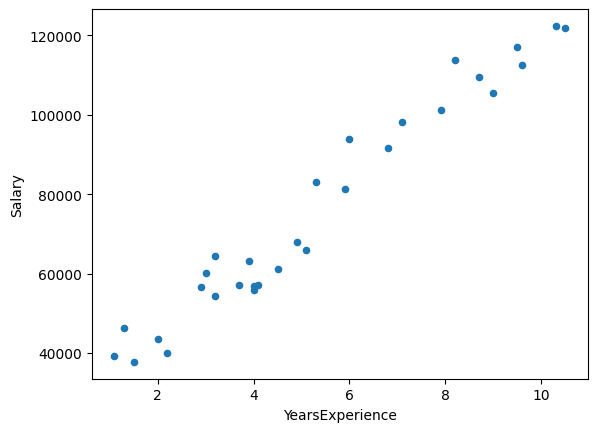

In [3]:
# visualize data columns to train
# data[['YearsExperience', 'Salary']].head()

# graph scatter between columns
data.plot.scatter(x ='YearsExperience', y ='Salary')
plt.show()

In [6]:
# SKLearn automatic implementation

# define data to train where X = input and Y = output
# alternatively, use np.array
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1)

# alternative definition of data = separate for training and testing with Pareto and random seed
# TRAIN is for calculating coeficient to determine non existent or actual values in TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# create Linear Regression model 
# for intercept = 0 add parameter fit_intercept = False
model = LinearRegression()
# TRAIN
model.fit(X, y)
# TRAIN - TEST
# model.fit(X_train, y_train)

# show result
print(f"- Intercepto (b): {model.intercept_[0]}") # returned in 1D array = squeeze()
print(f"- Pendiente  (w): {model.coef_[0][0]}")   # returned in 2D array = squeeze()

- Intercepto (b): 25792.20019866871
- Pendiente  (w): 9449.962321455074


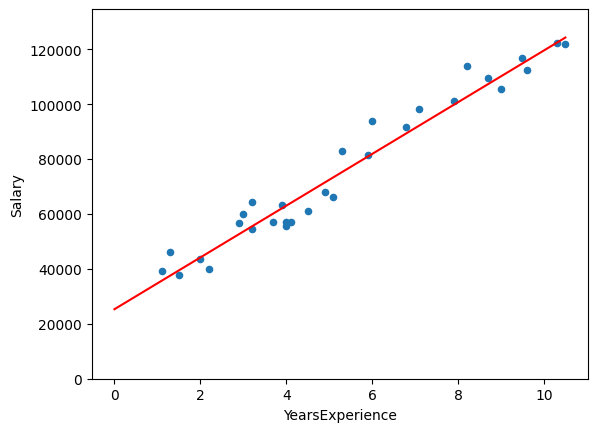

In [40]:
# TRAIN
# w = 9449.96232146
# b = 25792.20019867
# TRAIN - TEST
w = 9423.815323030976
b = 25321.583011776813

# create the values of the line according to X
x = np.linspace(0, data['YearsExperience'].max(), 100)
y = w * x + b

# graph the slope with the surrounding scatter
data.plot.scatter (x = 'YearsExperience', y ='Salary')
# paint the line in red
plt.plot(x, y, '-r')
# do until maximum value of Y plus 10% to go a little further
plt.ylim (0, data['Salary'].max() * 1.1)
plt.show()

In [54]:
# individual prediction
years = np.array([1.2]) # 1D array = [1.2]
salary = model.predict(years.reshape(-1,1)) # 2D array so method can read it = [[years]]
print(f"- Para {years.squeeze()} años de experiencia, el salario es: ${'%.2f' % salary.squeeze()}")

- Para 1.2 años de experiencia, el salario es: $36630.16


Text(0, 0.5, 'Salary')

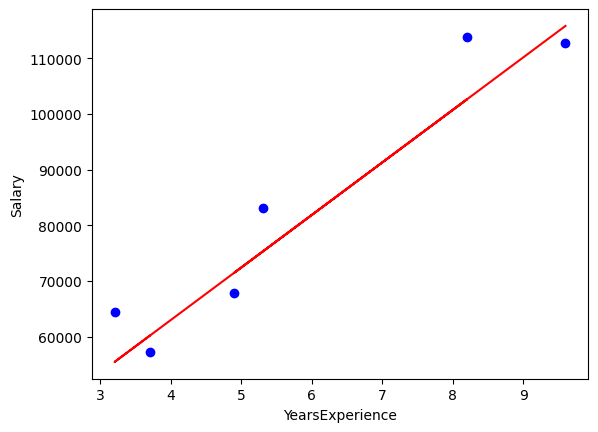

In [48]:
# total prediction of 20% of data
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color = 'blue')  # actual
plt.plot(X_test, y_pred, color = 'red') # predicted
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [49]:
# descriptive comparison converting arrrays into individual values
data_pred = pd.DataFrame({'Real': y_test.squeeze(), 'Estimado': y_pred.squeeze()})
print (data_pred)

       Real       Estimado
0  112635.0  115790.210113
1   67938.0   71498.278095
2  113812.0  102596.868661
3   83088.0   75267.804224
4   64445.0   55477.792045
5   57189.0   60189.699707


In [58]:
# get quality of the model
score_train = model.score(X_train, y_train) * 100
print(f"- El entrenamiento del modelo acierta en un {'%.2f' % score_train}%")
score_test = model.score(X_test, y_test) * 100
print(f"- El modelo describe los datos de prueba en un {'%.2f' % score_test}%")

- El entrenamiento del modelo acierta en un 96.45%
- El modelo describe los datos de prueba en un 90.24%
